# Starbucks Capstone Challenge 

### Problem Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.


### Project Overview

This capstone project is using data provided by Udacity as part of the Data Scientist Nanodegree course. It contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Starbucks sends out an offer to users of the mobile app. Some users might not receive any offer during certain weeks, and not all users receive the same offer.

### Problem Statement - Business Questions to be Answered

We will be exploring the Starbuck’s Dataset which simulates how people make purchasing decisions and how those decisions are influenced by promotional offers.
Other than that, in the following capstone project, I aim to answer following 2 business questions:

- What proportions of the users complete the offers based on their age and gender
- What kind of offers should be sent more to the users
- Will evaluate the model further to check for other important factors

### Strategy to be follow in the Project

The Project is done in the following order:
- Importing modules and reading the data
- Data Exploration
    - In this section will check the attributes of the individual dataframes provided in the Dataset
- Data Cleaning
    - In this section, will be cleaning the Dataframes, preparing a single dataframe by combining others for analysis
- Data Analysis (EDA)
    - In this section, will look to answer the business questions asked above, using visualizations
- Model Building and implementation
    - In this section, we apply various algorithms and Check their Performances on the datasets
    - **Metrics**
        - The metrics used to evaluate models on data set are -> Accuracy Score, F1 Score and Classification Report
- Feature Importance
    - In this section, we are trying to explore the most important features for making a decision
- Results
- Conclusion
- Future Improvements

### Metrics

I will be using accuracy scores, F-score and classifications reports as metrics for comparision and to test out the performance of the models.
Accuracy measures how well a model correctly predicts whether an offer is successful. 

However, if the percentage of successful or unsuccessful offers is very low, accuracy is not a good measure of model performance. For this situation, evaluating a models' precision and recall provides better insight to its performance. I chose the F1-score metric because it is "a weighted average of the precision and recall metrics".

To cover all the aspects of the accurracy and precision, will be evaluating the model on the classification reports.

### Data Overview

The data provided consists of 3 datasets:

1. Offer portfolio, which consists of the attributes of each offer (portfolio.json)
2. Demographic data for each customer (profile.json)
3. Transactional records of events occurring on the app (transcript.json)



### Data Sets

The data is contained in the following 3 files with their respective schemas

#### portfolio.json
This data set contains the user attributes. The schema of the dataset is as follows:
- id (string) - offer id
- offer_type (string) - type of offer ie BOGO, discount, informational
- difficulty (int) - minimum required spend to complete an offer
- reward (int) - reward given for completing an offer
- duration (int) - time for offer to be open, in days
- channels (list of strings)

#### profile.json
This data set contains the demographic area details, how different areas get different offers. It contains two of the most important features to answer our first business question, age and gender. We might explore the income affecting the offers as well. The schema for the dataset is as follows:
- age (int) - age of the customer
- became_member_on (int) - date when customer created an app account
- gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
- id (str) - customer id
- income (float) - customer's income

#### transcript.json
This data set contains the transactional records for the various users and offers availed over the app. The schema is as follows:
- event (str) - record description (ie transaction, offer received, offer viewed, etc.)
- person (str) - customer id
- time (int) - time in hours since start of test. The data begins at time t=0
- value - (dict of strings) - either an offer id or transaction amount depending on the record

## Imports and Loading Data

In [1]:
import pandas as pd
import numpy as np
import math
import json
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Exploration

After loading the data in the respective datasets, exploring the various features and how data is distributed across the various datasets.

Starting with initially portfolio dataset and then proceeding with profile and transcript dataframes

In [2]:
portfolio.shape, transcript.shape, profile.shape

((10, 6), (306534, 4), (17000, 5))

Exploring the portfolio dataset first

In [3]:
portfolio.head()

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5

This dataset contains the type of offers the user receives. Lets check for the different counts of the offers user receives over the app.

We need to check for what type of offers are received by the users and then can be used to apply classifications.

In [4]:
portfolio.describe()

difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000

In [5]:
portfolio['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

The user receives mostly BOGO (buy one get one) and discounted offers, followed by informational offers, which are in less quantity.

These are the main offers which users have received in the starbucks app.

In [6]:
portfolio.isna().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

Since no null values exist in the dataset, no need to impute any values at all.

After portfolio, **exploring the profile dataset**

In [7]:
profile.head()

age  became_member_on gender                                id    income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783       NaN
1   55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5       NaN
3   75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43       NaN

The data set contains three of the critical charateristics, age, gender and income.

These 3 are useful as we might be able to find a pattern on which user characteristic is more inclined to avail the available offer and can send them such types of offers more frequently than other offer types.

In [8]:
#Checking for any null values in the dataset
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

A lot of null values exist in the data set for gender and income.
They contain the same number of null values, it could be the case where same corresponding entries have the null values.
We need to explore data further to make sure whether these rows can be dropped or are they going to impact our analysis and the model

Text(0.5,0,'Gender')

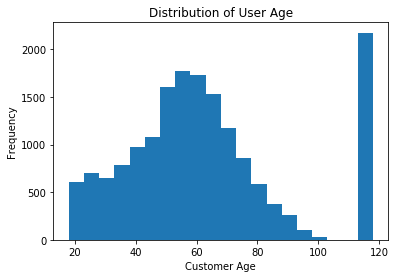

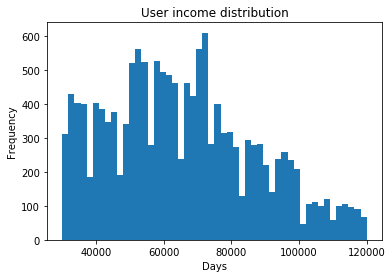

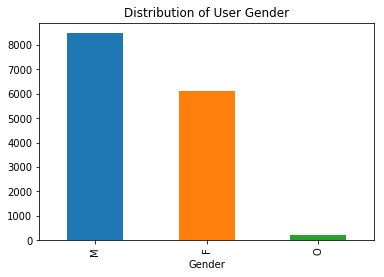

In [9]:
#checking age, income and gender distributions across the users
#Distribution of age
user_age = profile['age'].plot(kind='hist', bins=20, title='Distribution of User Age')
user_age.set_xlabel("Customer Age")
       
#Distribution of income
plt.figure()
user_income = profile['income'].plot(kind='hist', bins=50, title='User income distribution')
user_income.set_xlabel("Days")
    
# Display Histogram of User Income
plt.figure()
user_gender = profile['gender'].value_counts().plot.bar(title='Distribution of User Gender')
user_gender.set_xlabel("Gender")

Age=118 isn't making any sense, as it is clearly out of the normal distribution.
It is clearly showing as an outlier.

Checking what kind of values exist for age = 118

In [10]:
#checking count of age=118 value and corresponding gender and income columns
profile[profile['age']==118].count()


age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64

The null values we encountered earlier for gender and income exist only for age=118 data entries. 
The values corresponds to exactly the same number of values for which the gender and income have null values in the dataset.
Since, age=118 doesn't make any sense and hence dropping the entries from the dataframe.

In [11]:
#redefining the profile dataframe by dropping null values and age being 118
profile = profile.drop(profile[(profile["income"].isnull()) & (profile["age"] == 118)].index)

Text(0.5,0,'Customer Age')

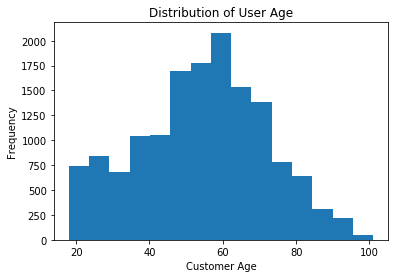

In [12]:
user_age = profile['age'].plot(kind='hist', bins=15, title='Distribution of User Age')
user_age.set_xlabel("Customer Age")

No more unexpected values of ages over 100 as that are clearly outliers (bad data) in our dataset.

In [13]:
#checking if there are still any null values in data set after deleting all the age=118 data values
profile.isna().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

####  Transactional Records

In [14]:
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}

In [15]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [16]:
#checking number of unique people represented, giving us the total user count
transcript['person'].nunique()

17000

The data shows there are 17k unique users for which we have the data for.
Checking further if the dataset contains any null values.

In [17]:
#check for null values
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

There are no null values in this data.



In [18]:
#further info for the dataset
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


### Data Cleaning 

Before we move to making analysis and predictions about our business questions posed above, we need to clean the data, so as to make our  job easier for the process.

This is one of the most important sections of the whole project. The whole analysis of the project is dependent on how we proceed to clean the dataframes and what features we select to include in the final dataframe, which will be used for analysis

Cleaning the 3 datasets for pre-processing and analyzing data to answer the business questions.

In [19]:
#firstly proceeding with portfolio dataset
def clean_portfolio(df=portfolio):
    """
    Takes the dataframe portfolio and cleans it by creating one-hot encodings.
    
    PARAMETERS:
        portfolio dataframe
        
    RETURNS:
        A new dataframe consisting of:
        ["id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "bogo", "discount", "informational"]
    """
    
    # change the duration from day to hour
    cleaned_portfolio = portfolio.copy()
    cleaned_portfolio['duration'] = cleaned_portfolio['duration'] * 24
    

    # https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
    channels = cleaned_portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    
    #offer_type column (BOGO, discount, informational)
    offer_type = pd.get_dummies(cleaned_portfolio['offer_type'])
    
    #concatinating the offer types and the channels to the df(portfolio)
    new_df = pd.concat([df, channels, offer_type], axis=1, sort=False)
    
    # Remove channels and offer_type as we don't specifically need these, can always add them later
    new_df = new_df.drop(['channels', 'offer_type'], axis=1)
    
    # Organize columns
    columns = ["id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "bogo", "discount", "informational"]
    new_df = new_df[columns]
    
    
    return new_df

In [20]:
#retrieving cleaned dataset after running the above created function
cleaned_portfolio = clean_portfolio() 
cleaned_portfolio.head(5)

id  difficulty  duration  reward  email  \
0  ae264e3637204a6fb9bb56bc8210ddfd          10         7      10      1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0          10         5      10      1   
2  3f207df678b143eea3cee63160fa8bed           0         4       0      1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           5         7       5      1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7          20        10       5      1   

   mobile  social  web  bogo  discount  informational  
0       1       1    0     1         0              0  
1       1       1    1     1         0              0  
2       1       0    1     0         0              1  
3       1       0    1     1         0              0  
4       0       0    1     0         1              0

Here we have created dummy columns from existing columns to make the representation easier for us.

**Proceeding with profile dataset**

In [21]:
profile.head(5)

age  became_member_on gender                                id    income
1    55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
3    75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
5    68          20180426      M  e2127556f4f64592b11af22de27a7932   70000.0
8    65          20180209      M  389bc3fa690240e798340f5a15918d5c   53000.0
12   58          20171111      M  2eeac8d8feae4a8cad5a6af0499a211d   51000.0

In [22]:
#cleaning the profile dataset
def clean_profile(profile = profile):
    """ 
    inpur:
        Profile dataframe.
        
    returns:
        A new dataframe that has dummy column as per our requirement
    """
    #already deleted the age=118 entries, so no need to delete 
    
    #One-hot encode Gender column, creating dummy variables for various genders listed
    gender_dummies = pd.get_dummies(profile["gender"])
    
    # Specifying age range and one hot encoding, creating the age groups
    range_ages = pd.cut(x=profile["age"], bins=[17,20, 29, 39, 49, 59, 69, 79, 89, 99])
    
    #Creating dummy columns for the age groups created above
    ages_dummies = pd.get_dummies(range_ages)
    
    #Creating the incomce bins and creating dummy columns based on the age income slabs created
    range_income = pd.cut(x=profile["income"], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000])
    income_dummies = pd.get_dummies(range_income)
    

    #adding the dummy columns created to profile dataframe
    new_df = pd.concat([profile, ages_dummies, income_dummies, gender_dummies], axis=1, sort=False)
    
    # Dropping age,gender,income column, as we have already created dummy columns for the same
    new_df = new_df.drop(["age", "gender", "income"], axis=1)

    
    return new_df

In [23]:
#retrieving cleaned data from profile dataframe
cleaned_profile = clean_profile() 
cleaned_profile.head(5)

became_member_on                                id  (17, 20]  (20, 29]  \
1           20170715  0610b486422d4921ae7d2bf64640c50b         0         0   
3           20170509  78afa995795e4d85b5d9ceeca43f5fef         0         0   
5           20180426  e2127556f4f64592b11af22de27a7932         0         0   
8           20180209  389bc3fa690240e798340f5a15918d5c         0         0   
12          20171111  2eeac8d8feae4a8cad5a6af0499a211d         0         0   

    (29, 39]  (39, 49]  (49, 59]  (59, 69]  (69, 79]  (79, 89] ...  \
1          0         0         1         0         0         0 ...   
3          0         0         0         0         1         0 ...   
5          0         0         0         1         0         0 ...   
8          0         0         0         1         0         0 ...   
12         0         0         1         0         0         0 ...   

    (50000, 60000]  (60000, 70000]  (70000, 80000]  (80000, 90000]  \
1                0               0               0               0   
3                0               0               0               0   
5                0               1               0               0   
8                1               0               0               0   
12               1               0               0               0   

    (90000, 100000]  (100000, 110000]  (110000, 120000]  F  M  O  
1                 0                 0                 1  1  0  0  
3                 1                 0                 0  1  0  0  
5                 0                 0                 0  0  1  0  
8                 0                 0                 0  0  1  0  
12                0                 0                 0  0  1  0  

[5 rows x 23 columns]

creating the plots for cleaned profile dataset for better understanding.

Added visualizations below to have better understanding of the dummy columns that have been added

Text(0.5,17.2,'Gender')

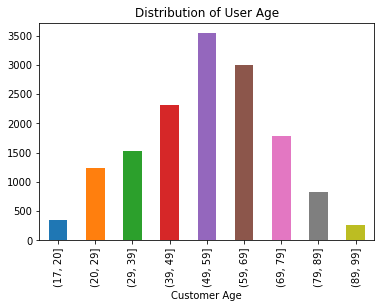

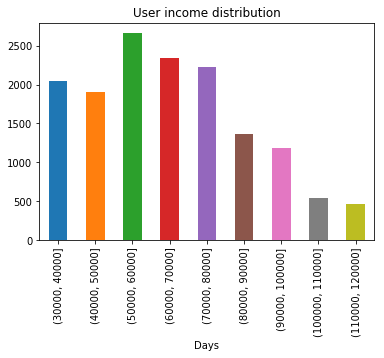

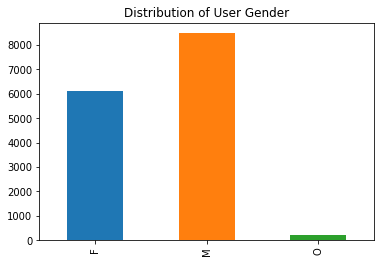

In [24]:
#checking age, income and gender distributions across the users on the cleaned profile dataset
user_age = cleaned_profile[cleaned_profile.columns[2:11]].sum().plot.bar( title='Distribution of User Age')
user_age.set_xlabel("Customer Age")
       
#Distribution of income
plt.figure()
user_income = cleaned_profile[cleaned_profile.columns[11:20]].sum().plot.bar(title='User income distribution')
user_income.set_xlabel("Days")
    
# Display Histogram of User Income
plt.figure()
user_gegder = cleaned_profile[cleaned_profile.columns[20:]].sum().plot.bar(title='Distribution of User Gender')
user_gender.set_xlabel("Gender")

Profile data set is cleaned and retrieved, with required classifications done for age, gender and income for the users.

**Proceeding with cleaning the transcript Dataset**

In [25]:
transcript.head(5)

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}

Since the value contains all the offer id's. We need to write a function which separates the offer id's as a column rather than value.
Then it would be clear for us to work on the data as well.

In [26]:
# Functions to create offer id and amount columns from the transcript table
#this is required as there are no offer id or anything they are set up un a value column
def create_offer_id_column(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]

In [27]:
#function to clean the transcript
def clean_transcript(transcript = transcript):
    '''
    data cleaning the transcript dataframe, return usable dataframe need contain offer events
    
    INPUT:
        transcript - the transcript dataframe to be cleaned
    
    returns:
        offer - the cleaned offer dataframe
    '''
    #creating cleaned transcript dataset as a copy of transcript
    cleaned_transcript = transcript.copy()
    
    # extract the rows that are related to offer action (e.g. offer received, offer viewed, offer completed)
    cleaned_transcript['offer_id'] = transcript.value.apply(create_offer_id_column)
    
    #creating dummy column for events, received, viewed, completed
    event = pd.get_dummies(transcript['event'])
    
    #combining dummy columns to dataframe
    cleaned_transcript = pd.concat([cleaned_transcript, event], axis=1, sort=False)
    
    # Create and Drop Transactions column as we dont need it
    transaction = cleaned_transcript[cleaned_transcript["transaction"]==1]
    cleaned_transcript = cleaned_transcript.drop(transaction.index)
    
    #dropping value column as we no longer need it, since we have already created dummy variables from it
    cleaned_transcript = cleaned_transcript.drop(columns=['value'])
    
    return cleaned_transcript

In [28]:
cleaned_transcript = clean_transcript()
cleaned_transcript.head(5)

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                           offer_id  offer completed  offer received  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               1   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7                0               1   
2  2906b810c7d4411798c6938adc9daaa5                0               1   
3  fafdcd668e3743c1bb461111dcafc2a4                0               1   
4  4d5c57ea9a6940dd891ad53e9dbe8da0                0               1   

   offer viewed  transaction  
0             0            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0

In [29]:
#values in cleaned dataframe
cleaned_transcript.shape

(167581, 8)

In [30]:
cleaned_transcript[cleaned_transcript['offer completed']==1].shape

(33579, 8)

**We can see only about 20% of the total offers which were sent to the users, have been completed by the users**

In [31]:
cleaned_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 8 columns):
event              167581 non-null object
person             167581 non-null object
time               167581 non-null int64
offer_id           167581 non-null object
offer completed    167581 non-null uint8
offer received     167581 non-null uint8
offer viewed       167581 non-null uint8
transaction        167581 non-null uint8
dtypes: int64(1), object(3), uint8(4)
memory usage: 7.0+ MB


## Further Data Cleaning

After cleaning data and retrieving the required Data, added visulizations to have better understanding of the problems and the results achieved. In this section after working on the individual dataframes and cleaning, now we are focussed to combine them and end up as a single dataframe, which can be used to answer the important questions.

In [32]:
cleaned_portfolio.head(5)

id  difficulty  duration  reward  email  \
0  ae264e3637204a6fb9bb56bc8210ddfd          10         7      10      1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0          10         5      10      1   
2  3f207df678b143eea3cee63160fa8bed           0         4       0      1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           5         7       5      1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7          20        10       5      1   

   mobile  social  web  bogo  discount  informational  
0       1       1    0     1         0              0  
1       1       1    1     1         0              0  
2       1       0    1     0         0              1  
3       1       0    1     1         0              0  
4       0       0    1     0         1              0

In [33]:
#renaming id column as offer id
cleaned_portfolio = cleaned_portfolio.rename(columns={'id':'offer_id'})

combining portfolio and transcript datasets to create a combined central dataframe. Once that done, combining transcript and profile datasets. All the merges here will be taking place on the cleaned datasets, not on the original ones

But rather than merging individually its better to create a function for it, where all the merging takes place.

In [34]:
#changing the column name from person to user_id, as it will used as a key for the merging part
cleaned_transcript = cleaned_transcript.rename(columns={"person":"user_id"})
cleaned_transcript.head(5)

event                           user_id  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                           offer_id  offer completed  offer received  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               1   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7                0               1   
2  2906b810c7d4411798c6938adc9daaa5                0               1   
3  fafdcd668e3743c1bb461111dcafc2a4                0               1   
4  4d5c57ea9a6940dd891ad53e9dbe8da0                0               1   

   offer viewed  transaction  
0             0            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0

In [35]:
cleaned_portfolio.head(5)

offer_id  difficulty  duration  reward  email  \
0  ae264e3637204a6fb9bb56bc8210ddfd          10         7      10      1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0          10         5      10      1   
2  3f207df678b143eea3cee63160fa8bed           0         4       0      1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           5         7       5      1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7          20        10       5      1   

   mobile  social  web  bogo  discount  informational  
0       1       1    0     1         0              0  
1       1       1    1     1         0              0  
2       1       0    1     0         0              1  
3       1       0    1     1         0              0  
4       0       0    1     0         1              0

In [36]:
cleaned_profile.head(5)


became_member_on                                id  (17, 20]  (20, 29]  \
1           20170715  0610b486422d4921ae7d2bf64640c50b         0         0   
3           20170509  78afa995795e4d85b5d9ceeca43f5fef         0         0   
5           20180426  e2127556f4f64592b11af22de27a7932         0         0   
8           20180209  389bc3fa690240e798340f5a15918d5c         0         0   
12          20171111  2eeac8d8feae4a8cad5a6af0499a211d         0         0   

    (29, 39]  (39, 49]  (49, 59]  (59, 69]  (69, 79]  (79, 89] ...  \
1          0         0         1         0         0         0 ...   
3          0         0         0         0         1         0 ...   
5          0         0         0         1         0         0 ...   
8          0         0         0         1         0         0 ...   
12         0         0         1         0         0         0 ...   

    (50000, 60000]  (60000, 70000]  (70000, 80000]  (80000, 90000]  \
1                0               0               0               0   
3                0               0               0               0   
5                0               1               0               0   
8                1               0               0               0   
12               1               0               0               0   

    (90000, 100000]  (100000, 110000]  (110000, 120000]  F  M  O  
1                 0                 0                 1  1  0  0  
3                 1                 0                 0  1  0  0  
5                 0                 0                 0  0  1  0  
8                 0                 0                 0  0  1  0  
12                0                 0                 0  0  1  0  

[5 rows x 23 columns]

### Creating concat function
The concat datasets function is used to merge all the datasets in a single large dataframe, where we can perform all the operations to answer our business questions.

In [37]:
def concat_dataframes():
    '''
    Input:
        None required as it is working on the cleaned dataframes
    Returns:
        Combined Dataframe after merging all the dataframes
    '''
    # Rename column id with person to merge with transcript, as it will be the key to merge
    new_cleaned_profile = cleaned_profile.rename(columns={"id": "user_id" })
    
    #  Merge cleaned portfolio and transcript
    final_transcript = pd.merge(cleaned_transcript,cleaned_portfolio, on='offer_id')
    
    # Merge profile with transcript on person column
    final_transcript = pd.merge(final_transcript,new_cleaned_profile, on="user_id")
    
    return final_transcript

In [38]:
#creating a dataframe df, by combining all the cleaned datasets
df = concat_dataframes()

In [39]:
#Getting overview of the dataframe
df.head(5)

event                           user_id  time  \
0   offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1     offer viewed  78afa995795e4d85b5d9ceeca43f5fef     6   
2  offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
3   offer received  78afa995795e4d85b5d9ceeca43f5fef   504   
4  offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   

                           offer_id  offer completed  offer received  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               1   
1  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               0   
2  9b98b8c7a33c4b65b9aebfe6a799e6d9                1               0   
3  f19421c1d4aa40978ebb69ca19b0e20d                0               1   
4  f19421c1d4aa40978ebb69ca19b0e20d                1               0   

   offer viewed  transaction  difficulty  duration ...  (50000, 60000]  \
0             0            0           5         7 ...               0   
1             1            0           5         7 ...               0   
2             0            0           5         7 ...               0   
3             0            0           5         5 ...               0   
4             0            0           5         5 ...               0   

   (60000, 70000]  (70000, 80000]  (80000, 90000]  (90000, 100000]  \
0               0               0               0                1   
1               0               0               0                1   
2               0               0               0                1   
3               0               0               0                1   
4               0               0               0                1   

   (100000, 110000]  (110000, 120000]  F  M  O  
0                 0                 0  1  0  0  
1                 0                 0  1  0  0  
2                 0                 0  1  0  0  
3                 0                 0  1  0  0  
4                 0                 0  1  0  0  

[5 rows x 40 columns]

**The above dataframe (df) is the final df that we need to answer the first business question** <br/>
It has 40 columns which contains the various columns created by us

Exploring the dataframe further before answering the business questions

In [40]:
df.shape

(148805, 40)

In [41]:
#retrieving the columns
df.columns

Index([           'event',          'user_id',             'time',
               'offer_id',  'offer completed',   'offer received',
           'offer viewed',      'transaction',       'difficulty',
               'duration',           'reward',            'email',
                 'mobile',           'social',              'web',
                   'bogo',         'discount',    'informational',
       'became_member_on',           (17, 20],           (20, 29],
                 (29, 39],           (39, 49],           (49, 59],
                 (59, 69],           (69, 79],           (79, 89],
                 (89, 99],     (30000, 40000],     (40000, 50000],
           (50000, 60000],     (60000, 70000],     (70000, 80000],
           (80000, 90000],    (90000, 100000],   (100000, 110000],
         (110000, 120000],                'F',                'M',
                      'O'],
      dtype='object')

If we take close look at all the columns, we can see they are not exactly strings.
The income slab columns and age gap columns are not string types.

Below i have created a new variable, which contains all the columns in string type and which is further used to designate the columns for the final combined dataframe(df).

In [42]:
new_cols = ['event', 'user_id', 'time', 'offer_id', 'offer completed', 'offer received', 'offer viewed', 'transaction', 'difficulty',
            'duration','reward','email','mobile', 'social','web', 'bogo','discount','informational','became_member_on', '17 - 20',
            '20 - 29','29 - 39','39 - 49','49 - 59','59 - 69','69 - 79','79 - 89','89 - 99','30k - 40k','40k - 50k','50k - 60k',
            '60k - 70k', '70k - 80k','80k - 90k','90k - 100k','100k - 110k','110k - 120k','F','M','O']

In [43]:
new_cols

['event',
 'user_id',
 'time',
 'offer_id',
 'offer completed',
 'offer received',
 'offer viewed',
 'transaction',
 'difficulty',
 'duration',
 'reward',
 'email',
 'mobile',
 'social',
 'web',
 'bogo',
 'discount',
 'informational',
 'became_member_on',
 '17 - 20',
 '20 - 29',
 '29 - 39',
 '39 - 49',
 '49 - 59',
 '59 - 69',
 '69 - 79',
 '79 - 89',
 '89 - 99',
 '30k - 40k',
 '40k - 50k',
 '50k - 60k',
 '60k - 70k',
 '70k - 80k',
 '80k - 90k',
 '90k - 100k',
 '100k - 110k',
 '110k - 120k',
 'F',
 'M',
 'O']

In [44]:
#assigning the cols in the string format to df, so they are uniform
df.columns = new_cols

In [45]:
df.head()

event                           user_id  time  \
0   offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1     offer viewed  78afa995795e4d85b5d9ceeca43f5fef     6   
2  offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
3   offer received  78afa995795e4d85b5d9ceeca43f5fef   504   
4  offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   

                           offer_id  offer completed  offer received  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               1   
1  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               0   
2  9b98b8c7a33c4b65b9aebfe6a799e6d9                1               0   
3  f19421c1d4aa40978ebb69ca19b0e20d                0               1   
4  f19421c1d4aa40978ebb69ca19b0e20d                1               0   

   offer viewed  transaction  difficulty  duration ...  50k - 60k  60k - 70k  \
0             0            0           5         7 ...          0          0   
1             1            0           5         7 ...          0          0   
2             0            0           5         7 ...          0          0   
3             0            0           5         5 ...          0          0   
4             0            0           5         5 ...          0          0   

   70k - 80k  80k - 90k  90k - 100k  100k - 110k  110k - 120k  F  M  O  
0          0          0           1            0            0  1  0  0  
1          0          0           1            0            0  1  0  0  
2          0          0           1            0            0  1  0  0  
3          0          0           1            0            0  1  0  0  
4          0          0           1            0            0  1  0  0  

[5 rows x 40 columns]

Initially, checking out of all the offers received by the users, how many offers were actually availed.
And what percentage is completed.

This is a much better dataset as the column names are in sync now, on which we can work and do our analysis.

In [46]:
# Number of completed taken
taken = df[df["offer completed"] == 1].shape[0]

# Number of records where offer not taken
not_taken = df[df["offer completed"] == 0].shape[0]

# offers completed to not completed
percent_taken = (taken / not_taken) * 100

# Print the results
print("Availed Offers: {}".format(taken))
print("Offers not availed: {}".format(not_taken))
print("Percentage of offers availed: {0:.2f}%".format(percent_taken))

Availed Offers: 32444
Offers not availed: 116361
Percentage of offers availed: 27.88%


As depicted by the data above, only 27% of the total offers are completed by the users.

## Exploratory Data Analysis

**Answering the Business Questions Initially raised**

This section contains exploring the data further to answer the initially stated business requirements.

**Below i am exploring if gender based offer completion gives us any pattern.**

In [47]:
gender_based_taken = df[df['offer completed']==1][['F','M','O']].sum()
(gender_based_taken/taken)*100

F    47.703736
M    50.752065
O     1.544199
dtype: float64

Text(0.5,0,'Gender')

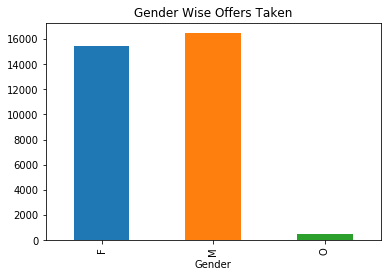

In [48]:
#visualizing how the different genders take and complete the offers from the app
user_gender_dist = gender_based_taken.plot.bar(title='Gender Wise Offers Taken')
user_gender_dist.set_xlabel("Gender")

As clearly depicted in the Graph there is not much difference between different genders.

The offers should be sent equally among all the genders, as the data represents 50% Males and 48% females take the offer.
Hence it should be sent to all of the users equally, irrespective of their gender.

Moving forward, Trying to do the same type of distribution for Income Based patters.

### Income Based distribution 

Text(0.5,0,'Income')

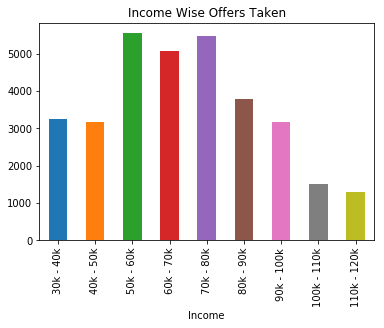

In [49]:
#defining age wise distribution for the offers taken
income_cols = ['30k - 40k','40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - 90k', '90k - 100k', '100k - 110k', '110k - 120k']
income_offer_taken = df[df['offer completed']==1][income_cols].sum()

#plot for income wise distribution for the offers taken
income_offer_taken_dist = income_offer_taken.plot.bar(title='Income Wise Offers Taken')
income_offer_taken_dist.set_xlabel("Income")



In [50]:
((df[df['offer completed']==1][income_cols].sum())/taken) * 100

30k - 40k      10.041918
40k - 50k       9.783011
50k - 60k      17.087905
60k - 70k      15.630009
70k - 80k      16.878313
80k - 90k      11.700160
90k - 100k      9.807669
100k - 110k     4.684996
110k - 120k     4.016151
dtype: float64

As depicted by the bar chart as well, most of the offers are availed by 50k-60k income people.
It is very close with income slabs of 60k-80k.

### Age wise distribution

Text(0.5,0,'Age Groups')

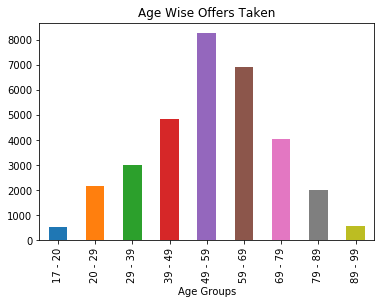

In [51]:
#age wise distribution for the offers availed
age_cols = ['17 - 20', '20 - 29', '29 - 39', '39 - 49', '49 - 59', '59 - 69', '69 - 79', '79 - 89', '89 - 99']
age_wise_offers_taken = df[df['offer completed']==1][age_cols].sum()
age_wise_offers_taken_dist = age_wise_offers_taken.plot.bar(title='Age Wise Offers Taken')
age_wise_offers_taken_dist.set_xlabel('Age Groups')

In [52]:
#percentage wise Breakdown
((df[df['offer completed']==1][age_cols].sum())/taken)*100

17 - 20     1.652077
20 - 29     6.688448
29 - 39     9.274442
39 - 49    14.976575
49 - 59    25.496240
59 - 69    21.310566
69 - 79    12.489212
79 - 89     6.173715
89 - 99     1.800025
dtype: float64

As depicted by the data above, most of the users which are aactually availing and using these offers belong to the age groups of 39-79.

**It would be better if more offers are sent to those age groups users**

Now we have looked into user characteristics, lets check how different types of offers can change the users mind whether to complete the offer or not.

Text(0.5,0,'Offers Validity')

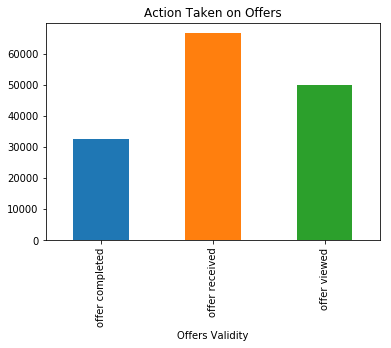

In [53]:
#offers wise distribution
#this contains how many offers received, how many were viewed and then completed
offers_dist = df[['offer completed', 'offer received', 'offer viewed']].sum()
offers_dist_gr = offers_dist.plot.bar(title='Action Taken on Offers')
offers_dist_gr.set_xlabel('Offers Validity')

We can clearly see there is a degression from offers viewed to completed.
Lets put them in graphs so its for us to understand them based on What kind of offers users are receiving

Mainly Users are receiving 3 types of offers:
- BOGO (Buy One Get One)
- Discount
- Informtional

Below i have tried to check of all the offer types, which offers are viewed the most on receiving and completed the most as well

Text(0.5,0,'Offer Type')

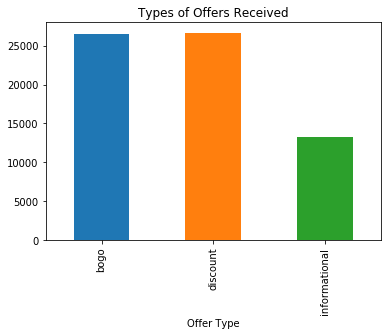

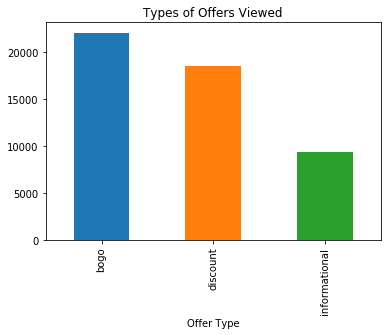

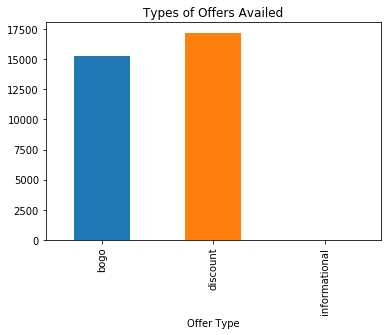

In [54]:
#types of offers viewed
offers_types = df[df['offer received']==1][['bogo', 'discount', 'informational']].sum()
offers_types_dist = offers_types.plot.bar(title='Types of Offers Received')
offers_types_dist.set_xlabel('Offer Type')

#types of offers viewed
plt.figure()
offers_types = df[df['offer viewed']==1][['bogo', 'discount', 'informational']].sum()
offers_types_dist = offers_types.plot.bar(title='Types of Offers Viewed')
offers_types_dist.set_xlabel('Offer Type')

#types of offers availed
plt.figure()
offers_type = df[df['offer completed']==1][['bogo', 'discount', 'informational']].sum()
offers_type_dist = offers_type.plot.bar(title='Types of Offers Availed')
offers_type_dist.set_xlabel('Offer Type')

In [55]:
(offers_type/df[df['offer completed']==1].shape[0])*100

bogo             47.028726
discount         52.971274
informational     0.000000
dtype: float64

It is clear form the data above that no user is using the informational data.

Everyone is clearly using the BOGO and Discount Offers.

**It Would be much better choice to stop sending informational offers (or atleast very minimal number of offers) and instead send more of BOGO and discount offers as the users are more inclined to avail those offers.**

Breaking down these offers received and completed further on all three.

In following steps, i am trying to see which kind of offers are most viewed and most completed.
Since informational offers are not even completed, so just going to see how much proporionally users view such offers.

### Offer wise breakdown

In [56]:
#deeping further down on the offers availed, based on offers viewed and received
r = df[df['offer received']==1].shape[0]
v = df[df['offer viewed']==1].shape[0]
c = df[df['offer completed']==1].shape[0]

print('The percentage of offers viewed after receiving: {:.2f}'.format((v/r)*100))
print('The percentage of offers completed after receiving: {:.2f}'.format((c/r)*100))
print('The percentage of offers completed after viewing: {:.2f}'.format((c/v)*100))

The percentage of offers viewed after receiving: 74.98
The percentage of offers completed after receiving: 48.79
The percentage of offers completed after viewing: 65.07


As clear from the results above, off all the offers received
 - users view 75% of all the offers
 - Complete only 48% of the offers received
 - Completes 65% of the total offers after viewing an offer

In [57]:
#since only bogo and discount offers are taken, looking futher how many such offers were viewed and how many were completed
print("BOGO Offers First:")
b_r = df[df['offer received']==1]['bogo'].sum()
b_v = df[df['offer viewed']==1]['bogo'].sum()
b_c = df[df['offer completed']==1]['bogo'].sum()
                                   
print('The percentage of BOGO offers viewed after receiving: {:.2f}'.format((b_v/b_r)*100))
print('The percentage of BOGO offers completed after receiving: {:.2f}'.format((b_c/b_r)*100))
                                 

BOGO Offers First:
The percentage of BOGO offers viewed after receiving: 83.05
The percentage of BOGO offers completed after receiving: 57.50


In [58]:
#since only bogo and discount offers are taken, looking futher how many such offers were viewed and how many were completed
print("Discount Offers Now:")
d_r = df[df['offer received']==1]['discount'].sum()
d_v = df[df['offer viewed']==1]['discount'].sum()
d_c = df[df['offer completed']==1]['discount'].sum()
                                   
print('The percentage of discount offers viewed after receiving: {:.2f}'.format((d_v/d_r)*100))
print('The percentage of discount offers completed after receiving: {:.2f}'.format((d_c/d_r)*100))
                                  

Discount Offers Now:
The percentage of discount offers viewed after receiving: 69.24
The percentage of discount offers completed after receiving: 64.45


In [59]:
print("Discount Offers Now:")
i_r = df[df['offer received']==1]['informational'].sum()
i_v = df[df['offer viewed']==1]['informational'].sum()
i_c = df[df['offer completed']==1]['informational'].sum()

print('Total offers received for informational: {}'.format(i_r))
print('Total offers viewed for informational: {}'.format(i_v))
print('Total offers completed for informational: {}'.format(i_c))
print('The percentage of informational offers viewed after receiving: {:.2f}'.format((i_v/i_r)*100))



Discount Offers Now:
Total offers received for informational: 13300
Total offers viewed for informational: 9360
Total offers completed for informational: 0
The percentage of informational offers viewed after receiving: 70.38


Text(0.5,0,'Source')

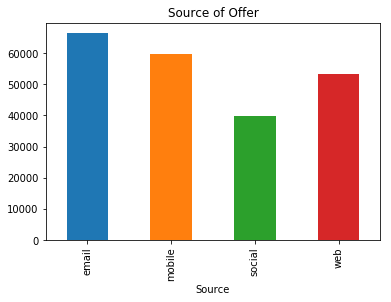

In [60]:
#sources from where most of the offers are completed
offers_types = df[df['offer received']==1][['email', 'mobile', 'social', 'web']].sum()
offers_types_dist = offers_types.plot.bar(title='Source of Offer')
offers_types_dist.set_xlabel('Source')

We can see that most of the offers that are completed, are equally disctributed among all the sources.

There is on distinction if sendint the offer through one medium can elevate the users to complete the offer more.

### Learnings
- Age:
    - There is a clear pattern of the users trying to complete the offers
    - Users in the age groups of 39-79 years completes the most offers
    - age groups of 49-59 are the ones completing the highest number of offers, so more offers can be sent to them
- Gender:
    - There is no clear indication if males or females completes the offer more than the other
    - The offers should be Sent equally
- Income:
    - There are no clear outliers for which income group completes the most offers
    - The income regions of 50k-80k completes more offers than others
    
#### What kind of offers should be sent more to the users
This can be broken down on 3 types.
- Type:
    - Informational offers are not completed at all by any of the users, so even if they are not sent to the users, it won't impact the revenue
    - BOGO And discount offers should be sent equally, where BOGO are viewed more by the users and discount is completed more by the users on viewing the offer.

## Model Building and Implementation

In this section, i have tried to apply the Random Forest Classifier on the dataframe to check for the accuracy of the predictions.
It will give us indicator of the quality of the final data frame that we are using.

Other than RF (Random Classifier), i have also tested the model on k nearest neighbor and Decision Tree Classifier as well. This is done to compare the different models on the dataset and also to practice other Classifier models as well.

**Order:**
- Random Forest Classifier
- KNN
- Decision Tree Classifier

Once the models are tested, i have applied classification report along with accuracy as evaluation metrics for the model.

### Random Forest Classifier

Before simply applying the model on the dataset, cleaning the dataframe for the columns which we are not interested.

In [61]:
df.head(5)

event                           user_id  time  \
0   offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1     offer viewed  78afa995795e4d85b5d9ceeca43f5fef     6   
2  offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
3   offer received  78afa995795e4d85b5d9ceeca43f5fef   504   
4  offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   

                           offer_id  offer completed  offer received  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               1   
1  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               0   
2  9b98b8c7a33c4b65b9aebfe6a799e6d9                1               0   
3  f19421c1d4aa40978ebb69ca19b0e20d                0               1   
4  f19421c1d4aa40978ebb69ca19b0e20d                1               0   

   offer viewed  transaction  difficulty  duration ...  50k - 60k  60k - 70k  \
0             0            0           5         7 ...          0          0   
1             1            0           5         7 ...          0          0   
2             0            0           5         7 ...          0          0   
3             0            0           5         5 ...          0          0   
4             0            0           5         5 ...          0          0   

   70k - 80k  80k - 90k  90k - 100k  100k - 110k  110k - 120k  F  M  O  
0          0          0           1            0            0  1  0  0  
1          0          0           1            0            0  1  0  0  
2          0          0           1            0            0  1  0  0  
3          0          0           1            0            0  1  0  0  
4          0          0           1            0            0  1  0  0  

[5 rows x 40 columns]

In [62]:
df_final = df.drop(['event', 'user_id', 'time', 'offer_id', 'became_member_on'],axis=1)

In [63]:
df_final.head(5)

offer completed  offer received  offer viewed  transaction  difficulty  \
0                0               1             0            0           5   
1                0               0             1            0           5   
2                1               0             0            0           5   
3                0               1             0            0           5   
4                1               0             0            0           5   

   duration  reward  email  mobile  social ...  50k - 60k  60k - 70k  \
0         7       5      1       1       0 ...          0          0   
1         7       5      1       1       0 ...          0          0   
2         7       5      1       1       0 ...          0          0   
3         5       5      1       1       1 ...          0          0   
4         5       5      1       1       1 ...          0          0   

   70k - 80k  80k - 90k  90k - 100k  100k - 110k  110k - 120k  F  M  O  
0          0          0           1            0            0  1  0  0  
1          0          0           1            0            0  1  0  0  
2          0          0           1            0            0  1  0  0  
3          0          0           1            0            0  1  0  0  
4          0          0           1            0            0  1  0  0  

[5 rows x 35 columns]

Now we have dropped few columns in which we were not interested, now we are proceeding with applying the model on it.

Initially, breaking down the dataframe in two sections:
X -> features (resulting to offer completed)
Y -> target (offer completed)

In [64]:
X = df_final.drop(['offer completed'], axis=1)
Y = df_final['offer completed']

In [65]:
X.shape, Y.shape

((148805, 34), (148805,))

In [66]:
#splitting the dataset in the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
#defining classifier, using random forest as the main classifier
classifier = RandomForestClassifier()

In [68]:
# training the data
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
# making the predictions on the test
y_pred = classifier.predict(X_test)

In [70]:
#checking the accuracy and retrieving classification report of the predictions using classifier
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23328
          1       1.00      1.00      1.00      6433

avg / total       1.00      1.00      1.00     29761



In [71]:
print(f1_score(y_test, y_pred,  labels=None))

1.0


As we proceeded with RFC (Random Forest Classifier), applying the same methodology on rest of the classifiers as well

### K-Nearest Neighbor

In [72]:
#initializing the classifier
knn = KNeighborsClassifier()

In [73]:
#training the classifier and fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
#perdicting the values using knn
y_pred = knn.predict(X_test)

In [75]:
#running accuracy test on the model
print(f'Accuracy of K-NN classifier on training set: {round(knn.score(X_train, y_train)*100,2)}%.')


Accuracy of K-NN classifier on training set: 99.71%.


In [76]:
#running the classifaction report on the predicted values
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23328
          1       0.99      0.98      0.99      6433

avg / total       0.99      0.99      0.99     29761



In [77]:
print(f1_score(y_test, y_pred,  labels=None))

0.985032740879


### Decision Tree Classifier

In [78]:
#initializing the classifier
dt = DecisionTreeClassifier()

In [79]:
#fitting the model on training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
#perdicting the values using Decision Tree Classifier
y_pred = dt.predict(X_test)

In [81]:
#model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [82]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23328
          1       1.00      1.00      1.00      6433

avg / total       1.00      1.00      1.00     29761



In [83]:
print(f1_score(y_test, y_pred,  labels=None))

1.0


### Naive Bayes

In [84]:
#initializing the classifier
gnb = GaussianNB()

In [85]:
#fitting the model
gnb.fit(X_train, y_train) 

GaussianNB(priors=None)

In [86]:
#perdicting the values using Naive Bayes Classifier
y_pred = gnb.predict(X_test)

In [87]:
#model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [88]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23328
          1       1.00      1.00      1.00      6433

avg / total       1.00      1.00      1.00     29761



In [89]:
print(f1_score(y_test, y_pred,  labels=None))

1.0


## Model Results Comparison

In [90]:
#by referencing: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#this is function which will be used for accuracy for the various models which we have used above
def pred_score(model):
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    # Calculate the absolute errors
    errors = abs(y_pred - y_test)
    # Calculate mean absolute percentage error
    msqe = mean_squared_error(y_test,y_pred)
    accuracy = 100 - msqe
    return round(accuracy, 2)

In [91]:
#creating a list of classifiers and running the loop to mode
models = [classifier, knn, dt, gnb]
model_names = [type(n).__name__ for n in models]

In [92]:
#creating a list for prediction accuracy for all the models
pred_accuracy = [pred_score(a)  for a in models]

In [93]:
#using results as the prediction list and using it project the results achieved on each model
results = [pred_accuracy]
results_df = pd.DataFrame(results, columns = model_names, index=['Predicting Accuracy']) 
results_df

RandomForestClassifier  KNeighborsClassifier  \
Predicting Accuracy                   100.0                 99.99   

                     DecisionTreeClassifier  GaussianNB  
Predicting Accuracy                   100.0       100.0

Given the above results and the individual model evaluation, random forest classifier is performing the best pof all the models and can be used as the classifier for the  Feature Importance section Below.

But why random classifier?
Random Forest Classifier is the best model to proceed as the set up of the classifier wouldn't allow any opverfitting of the values.

## Feature Importance

In this section, i try to find the features which are most likely to effect the users while taking an offer and making a deciision whether to complete the offer or not

### Tuning the dataframe for the feature importance

In [94]:
df.head(5)

event                           user_id  time  \
0   offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1     offer viewed  78afa995795e4d85b5d9ceeca43f5fef     6   
2  offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
3   offer received  78afa995795e4d85b5d9ceeca43f5fef   504   
4  offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   

                           offer_id  offer completed  offer received  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               1   
1  9b98b8c7a33c4b65b9aebfe6a799e6d9                0               0   
2  9b98b8c7a33c4b65b9aebfe6a799e6d9                1               0   
3  f19421c1d4aa40978ebb69ca19b0e20d                0               1   
4  f19421c1d4aa40978ebb69ca19b0e20d                1               0   

   offer viewed  transaction  difficulty  duration ...  50k - 60k  60k - 70k  \
0             0            0           5         7 ...          0          0   
1             1            0           5         7 ...          0          0   
2             0            0           5         7 ...          0          0   
3             0            0           5         5 ...          0          0   
4             0            0           5         5 ...          0          0   

   70k - 80k  80k - 90k  90k - 100k  100k - 110k  110k - 120k  F  M  O  
0          0          0           1            0            0  1  0  0  
1          0          0           1            0            0  1  0  0  
2          0          0           1            0            0  1  0  0  
3          0          0           1            0            0  1  0  0  
4          0          0           1            0            0  1  0  0  

[5 rows x 40 columns]

In [95]:
df.columns

Index(['event', 'user_id', 'time', 'offer_id', 'offer completed',
       'offer received', 'offer viewed', 'transaction', 'difficulty',
       'duration', 'reward', 'email', 'mobile', 'social', 'web', 'bogo',
       'discount', 'informational', 'became_member_on', '17 - 20', '20 - 29',
       '29 - 39', '39 - 49', '49 - 59', '59 - 69', '69 - 79', '79 - 89',
       '89 - 99', '30k - 40k', '40k - 50k', '50k - 60k', '60k - 70k',
       '70k - 80k', '80k - 90k', '90k - 100k', '100k - 110k', '110k - 120k',
       'F', 'M', 'O'],
      dtype='object')

In [96]:
#initializing the features and target sets, x -> Feaetures, Y -> Targets
X = df.drop(['offer completed','user_id', 'event', 'offer_id','offer received', 'offer viewed', 'informational'], axis=1)
Y = df['offer completed']

#dropped the categorical data and columns likeuser id, offer_id aren't important either

In [97]:
X.shape, Y.shape

((148805, 33), (148805,))

In [98]:
#splitting the dataset in the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [99]:
def feature_plot(importances, X_train, y_train, n=5):
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:n]]
    values = importances[indices][:n]

    #Creating the plot for weight and the features 
    fig = plt.figure(figsize = (12,6))
    plt.title(f"Normalized Weights for First {n} Predictive Features", fontsize = 16)
    plt.bar(np.arange(n), values, width = 0.6, align="center", color = '#E26741', \
          label = "Feature Weight")
    plt.bar(np.arange(n) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#8E1FEF', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(n), columns)
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Features", fontsize = 12)
    
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    sns.despine(bottom=True, left=True)
    plt.show()

In [100]:
cls = RandomForestClassifier()

In [101]:
model = cls.fit(X_train, y_train)

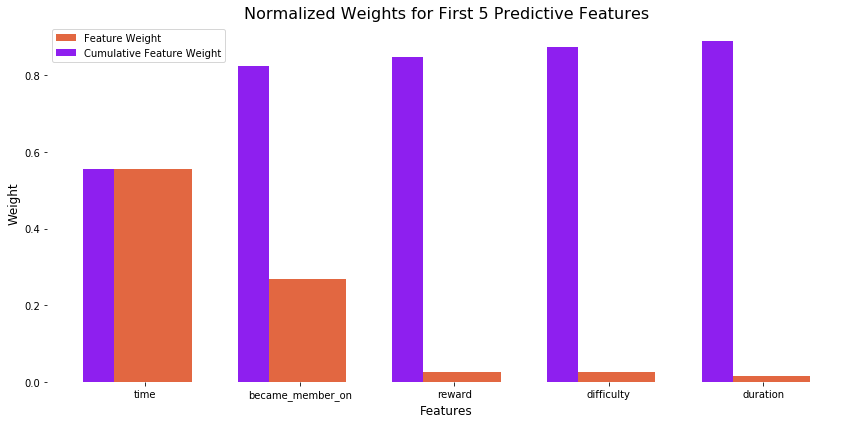

In [102]:
importances = model.feature_importances_

#Plot the most important features
feature_plot(importances, X_train, y_train, 5)


**From the above graph we can see that our supervised model predicted TOP 5 features are Time, Became Member On, Reward, Difficulty and Duration. These are most likely to determine if the offer would be completed by the user or not.**

We need to be aware that the age ranges and income ranges of cutomers are not much of a factor since they are divided into ranges but would produce more significant effect on feature drivers had it been taken as a whole. If they were considered as just single feature as age or income, than this might have been a very  different conclusion for feature importance.

## Hyper Parameter Tuning

Grid Search Cross Validation is used for hyper parameter tuning. <br/>
Referenced the sklearn documentation to perform the hyper parameter tuning.<br/>
Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [ ]:
#Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
print("Initializing the estimator")
#intializing the estimator
svc = svm.SVC()

print("# Tuning for hyper-parameters:")

clf = GridSearchCV(svc, tuned_parameters)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_pred =  clf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# Tuning to get better accuracy
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
print("Initializing the estimator")
#intializing the estimator
svc = svm.SVC()

clf = GridSearchCV(svc, tuned_parameters)
clf.fit(X_train, y_train)

svc = svm.SVC()

grid = GridSearchCV(svc, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

print(f'Best Score: {grid_result.best_score_}')
print(f'Best params: {grid_result.best_params_}')


Initializing the estimator


Grid Search was running very slow as it was involved with a lot of data, hence a lot of fittings.
Using Randomized Search Below for faster response.

In [106]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [10,50,100,500]
# number of features at every split
max_features = ['auto', 'sqrt']

#max depth
max_depth = [int(x) for x in np.linspace(100, 400, num = 5)]
max_depth.append(None)
#creating random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [107]:
#Randomize search of parameters
rfc_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)

#reducing the data set size as previously it was timing out due to large data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=42)

In [ ]:
# Fit the model
rfc_random.fit(X_train, y_train)

In [ ]:
print(rfc_random.best_params_)

In [ ]:
print(rfc_randomt.best_score_)

## Conclusion

### Reflection on results

In this capstone project we worked on 3 data files containing portfolio, profile and transcript data, which was in json format. We explored the Starbuck’s Dataset which mimics the users responses on the various offers that starbucks offers and people use it through their starbucks app. We investigated how people make purchasing decisions and how those decisions are influenced by promotional offers. There were 3 promotional offers which we encounterd during the study, which were: BOGO (Buy one get one), Discount and informational.

Before exploring the data, we wanted to give our project a particular direction. <br/>
Our focus during the capstone project was on answering the following business Questions:
- What proportions of the users complete the offers based on their age and gender
- What kind of offers should be sent more to the users
- Will evaluate the model further to check for other important factors

For this project, we started by exploring the dataframes. After that we cleaned the individual dataframes, after cleaning the data frames, we combined all the dataframes into a single dataframe, to perform all the analysis to answer the business questions on the combined dataframe itself.

**Q1: What proportions of the users complete the offers based on their age and gender** <br/>
**Gender:** Their was no clear pattern as what gender completes the most offers. While doing the analysis, we found that both males and females completes the offers equally, so their is no point in sending more offers to one than the other.

**Age:** We found that most of the users which are aactually availing and using these offers belong to the age groups of 39-79, Age Group of 49-59 being the group which completes the most number of offers. It would be better if more offers are sent to those age groups users, as they are more likely to complete offers than others and it will help Generate more revenue.

As an exercise, looked at income perspective as well.
**Income:** Most of the offers are availed by 50k-60k income people. It is very close with income slabs of 60k-80k. Sending more offers to the income Groups of 50k-80k would result in more probable users completing the offer.


**Q2: What kind of offers should be sent more to the users** <br/>
Clearly users are not completing any of the informational offers, so it would be advisable to reduce the number of informational offers, as even after viewing 70% of the offers, none of them were completed by the user.
For BOGO and discount offers, BOGO offers are viewed more than discount offers (83% to 70%), but discount offers are completed more often than BOGO (65% to 57%).
Therefore, it is concluded that it is better to send more BOGO and discount offers, discount slightly more than BOGO offers to the users.

**Additional Question: Does source have any impact on the users likelihood to complete the offer.** <br/>
There are 4 ways in which the users receive the offers: email, social, web and mobile.
There were no clear indication as to if one is clearly the major source for completing the offers. Therefore the offers should be sent equally among all the sources.

### Model Implemenation

In addition to answer the business questions, created different supervised models, which was also a good practive to test and the various techniques. Initially, tested the model on Random Forest Classifier, but for practice and comparison, worked on 3 others models as well, which were Decision Tree Classifier, Gaussian NB and k nearest neighbor Classifier, to aid in prediction of the feature was a challenging yet intriguing step. We compared the performances of these models and found out that Random Forest Works best in this particular scenario.

### Feature Selection

In addition to the model implemetation, i also implemented the method to find the 5 most important features. After performing the function on the dataset, we found that following 5 were most important features that make an indication whether the user will complete the offer or not: Time, Became Member On, Reward, Difficulty and Duration.

### Challenges Faced

Initially the major challenge that i faced was to figure out how the 3 dataframes needs to be combined to do the analysis part. There were a lot of columns which could be used, it was challenging as to figure out which columns to keep for cleaning and further analysis. Cleaning part was very critical and challenging as well as to figure out the characteristics and think of future steps ahead, as the datafame will be constructed based on that.

Once the dataframes were cleaned, it was challenging to combine the datasets and which columns to use for merging the datasets. <br/> There were few challenges faced during building the ML models as well. It was challenging to build the practical models of Random Forest Classifier. Once done with that, it was easier to build the other models such as Decision Tree Classifier, Naives-Bayes and Gaussian NB.

## Future Improvements

While working with the data i noticed there can be few features that can be captured as part of the data that will help to predict and send better offers to the users. <br/>

Along with that, below are the few points that can be considered for future work:
- More data can be collected as part of the exercise which can improve the model further:
    - When was transacation completed 
    - Which branch and what time of the day <br/>
    This will help in sending better offers -> when and where
- Better Data Gathering Model to deal with NaN values
- Testing More Machine Learning Algorithms
- Making Transaction Amount Prediction Model
- Deploying Web based app